In [1]:

import numpy as np

import scqubits as scq
import qutip as qt
import qims as qims

from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from importlib import reload


In [2]:
N = 3

# JJcirc_yaml, trans_mat = jjc.JJCircuit(83.13,9.99,\
#                                        1.996,0.039,\
#                                        N)
JJcirc_yaml, trans_mat = qims.JJCircuit(100,1,\
                                       0.01,0.01,\
                                       N)

JJcirc = scq.Circuit(JJcirc_yaml, from_file=False,
                               ext_basis="discretized")
closure_branches = [JJcirc.branches[0]]
JJcirc.configure(transformation_matrix=trans_mat,closure_branches=closure_branches)

ncut = 14
if N==1:
    JJcirc.cutoff_n_1 = ncut
elif N==2:
    JJcirc.cutoff_n_1 = ncut
    JJcirc.cutoff_n_2 = ncut
elif N==3:
    JJcirc.cutoff_n_1 = ncut
    JJcirc.cutoff_n_2 = ncut
    JJcirc.cutoff_n_3 = ncut
elif N==4:
    JJcirc.cutoff_n_1 = ncut
    JJcirc.cutoff_n_2 = ncut
    JJcirc.cutoff_n_3 = ncut
    JJcirc.cutoff_n_4 = ncut

print("Variable types:",JJcirc.var_categories)
print("Potential energy: ",JJcirc.sym_potential())
# JJcirc.sym_hamiltonian()

Variable types: {'periodic': [1, 2, 3], 'extended': [], 'free': [], 'frozen': []}


<IPython.core.display.Latex object>

Potential energy:  None


Spectral data:   0%|          | 0/41 [00:00<?, ?it/s]

<Figure size 1120x800 with 0 Axes>

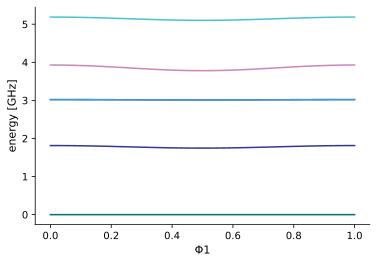

In [3]:
from matplotlib.pyplot import figure

figure(figsize=(14, 10), dpi=80)
JJcirc.plot_evals_vs_paramvals("Φ1", np.linspace(0,1,41),subtract_ground=True,filename='spect.pdf');

## Fixed EJ_large

In [ ]:
ME = {}
SPECT = {}
for NCUT in tqdm([10,12,14,15]):
    for njjc in [1,2,3,4]:
        N = njjc

        JJcirc_yaml, trans_mat = qims.JJCircuit(83.13,9.99,1.996,0.039,N)
        # JJcirc_yaml, trans_mat = jjc.JJCircuit(10,1,1.0,1,N)
        
        
        JJcirc = scq.Circuit(JJcirc_yaml, from_file=False,
                                       ext_basis="discretized")
        closure_branches = [JJcirc.branches[0]]
        JJcirc.configure(transformation_matrix=trans_mat,closure_branches=closure_branches)
        print("Variable types:",JJcirc.var_categories)
        print("Potential energy: ",JJcirc.potential_symbolic)


        # for i in tqdm(range(N)):
        #     vars(JJcirc)["_cutoff_n_"+str(i+1)]=15
        ncut = NCUT
        if N==1:
            JJcirc.cutoff_n_1 = ncut
        elif N==2:
            JJcirc.cutoff_n_1 = ncut
            JJcirc.cutoff_n_2 = ncut
        elif N==3:
            JJcirc.cutoff_n_1 = ncut
            JJcirc.cutoff_n_2 = ncut
            JJcirc.cutoff_n_3 = ncut
        elif N==4:
            JJcirc.cutoff_n_1 = ncut
            JJcirc.cutoff_n_2 = ncut
            JJcirc.cutoff_n_3 = ncut
            JJcirc.cutoff_n_4 = ncut


        N_JJC = 0
        for i in range(N):
            N_JJC = N_JJC + qt.Qobj(vars(JJcirc)['n'+str(i+1)+'_operator']())

        scan = []
        scan2 = []
        ph_list = np.linspace(0,1,31)
        for ph in tqdm(ph_list):
            JJcirc.Φ1 = ph
            evals, evecs = JJcirc.eigensys()
            scan2.append(evals)
            v0 = qt.Qobj(evecs.T[0])
            v1 = qt.Qobj(evecs.T[1])
            scan.append(np.abs((v0.dag()*N_JJC*v1).full()[0,0])/N)

        ME[N,ncut] = np.array(scan)
        SPECT[N,ncut] = np.array(scan2)

## Fixed EL

In [ ]:
ME = {}
SPECT = {}
for NCUT in tqdm([10,12,14,15]):
    for njjc in [1,2,3,4]:
        N = njjc

        # JJcirc_yaml, trans_mat = jjc.JJCircuit(83.13,9.99,1.996,0.039,N)
        # JJcirc_yaml, trans_mat = jjc.JJCircuit(10,1,1.0,1,N)
        
        EL = 0.5
        JJcirc_yaml, trans_mat = qims.JJCircuit(EL*N,9.99,1.996,0.039,N)
        JJcirc = scq.Circuit(JJcirc_yaml, from_file=False,
                                       ext_basis="discretized")
        closure_branches = [JJcirc.branches[0]]
        JJcirc.configure(transformation_matrix=trans_mat,closure_branches=closure_branches)
        print("Variable types:",JJcirc.var_categories)
        print("Potential energy: ",JJcirc.potential_symbolic)


        # for i in tqdm(range(N)):
        #     vars(JJcirc)["_cutoff_n_"+str(i+1)]=15
        ncut = NCUT
        if N==1:
            JJcirc.cutoff_n_1 = ncut
        elif N==2:
            JJcirc.cutoff_n_1 = ncut
            JJcirc.cutoff_n_2 = ncut
        elif N==3:
            JJcirc.cutoff_n_1 = ncut
            JJcirc.cutoff_n_2 = ncut
            JJcirc.cutoff_n_3 = ncut
        elif N==4:
            JJcirc.cutoff_n_1 = ncut
            JJcirc.cutoff_n_2 = ncut
            JJcirc.cutoff_n_3 = ncut
            JJcirc.cutoff_n_4 = ncut


        N_JJC = 0
        for i in range(N):
            N_JJC = N_JJC + qt.Qobj(vars(JJcirc)['n'+str(i+1)+'_operator']())

        scan = []
        scan2 = []
        ph_list = np.linspace(0,1,31)
        for ph in tqdm(ph_list):
            JJcirc.Φ1 = ph
            evals, evecs = JJcirc.eigensys()
            scan2.append(evals)
            v0 = qt.Qobj(evecs.T[0])
            v1 = qt.Qobj(evecs.T[1])
            scan.append(np.abs((v0.dag()*N_JJC*v1).full()[0,0])/N)

        ME[N,ncut] = np.array(scan)
        SPECT[N,ncut] = np.array(scan2)

  0%|          | 0/4 [00:00<?, ?it/s]

Variable types: {'periodic': [1], 'extended': [], 'free': [], 'frozen': []}
Potential energy:  -EJ*cos(θ1) - EJb*cos(Φ1 - θ1)


  0%|          | 0/31 [00:00<?, ?it/s]

Variable types: {'periodic': [1, 2], 'extended': [], 'free': [], 'frozen': []}
Potential energy:  -EJ*cos(θ1) - EJ*cos(θ2) - EJb*cos(-Φ1 + θ1 + θ2)


  0%|          | 0/31 [00:00<?, ?it/s]

Variable types: {'periodic': [1, 2, 3], 'extended': [], 'free': [], 'frozen': []}
Potential energy:  -EJ*cos(θ1) - EJ*cos(θ2) - EJ*cos(θ3) - EJb*cos(-Φ1 + θ1 + θ2 + θ3)


  0%|          | 0/31 [00:00<?, ?it/s]

Variable types: {'periodic': [1, 2, 3, 4], 'extended': [], 'free': [], 'frozen': []}
Potential energy:  -EJ*cos(θ1) - EJ*cos(θ2) - EJ*cos(θ3) - EJ*cos(θ4) - EJb*cos(-Φ1 + θ1 + θ2 + θ3 + θ4)


  0%|          | 0/31 [00:00<?, ?it/s]

Variable types: {'periodic': [1], 'extended': [], 'free': [], 'frozen': []}
Potential energy:  -EJ*cos(θ1) - EJb*cos(Φ1 - θ1)


  0%|          | 0/31 [00:00<?, ?it/s]

Variable types: {'periodic': [1, 2], 'extended': [], 'free': [], 'frozen': []}
Potential energy:  -EJ*cos(θ1) - EJ*cos(θ2) - EJb*cos(-Φ1 + θ1 + θ2)


  0%|          | 0/31 [00:00<?, ?it/s]

Variable types: {'periodic': [1, 2, 3], 'extended': [], 'free': [], 'frozen': []}
Potential energy:  -EJ*cos(θ1) - EJ*cos(θ2) - EJ*cos(θ3) - EJb*cos(-Φ1 + θ1 + θ2 + θ3)


  0%|          | 0/31 [00:00<?, ?it/s]

Variable types: {'periodic': [1, 2, 3, 4], 'extended': [], 'free': [], 'frozen': []}
Potential energy:  -EJ*cos(θ1) - EJ*cos(θ2) - EJ*cos(θ3) - EJ*cos(θ4) - EJb*cos(-Φ1 + θ1 + θ2 + θ3 + θ4)


  0%|          | 0/31 [00:00<?, ?it/s]

Variable types: {'periodic': [1], 'extended': [], 'free': [], 'frozen': []}
Potential energy:  -EJ*cos(θ1) - EJb*cos(Φ1 - θ1)


  0%|          | 0/31 [00:00<?, ?it/s]

Variable types: {'periodic': [1, 2], 'extended': [], 'free': [], 'frozen': []}
Potential energy:  -EJ*cos(θ1) - EJ*cos(θ2) - EJb*cos(-Φ1 + θ1 + θ2)


  0%|          | 0/31 [00:00<?, ?it/s]

Variable types: {'periodic': [1, 2, 3], 'extended': [], 'free': [], 'frozen': []}
Potential energy:  -EJ*cos(θ1) - EJ*cos(θ2) - EJ*cos(θ3) - EJb*cos(-Φ1 + θ1 + θ2 + θ3)


  0%|          | 0/31 [00:00<?, ?it/s]

Variable types: {'periodic': [1, 2, 3, 4], 'extended': [], 'free': [], 'frozen': []}
Potential energy:  -EJ*cos(θ1) - EJ*cos(θ2) - EJ*cos(θ3) - EJ*cos(θ4) - EJb*cos(-Φ1 + θ1 + θ2 + θ3 + θ4)


  0%|          | 0/31 [00:00<?, ?it/s]

Variable types: {'periodic': [1], 'extended': [], 'free': [], 'frozen': []}
Potential energy:  -EJ*cos(θ1) - EJb*cos(Φ1 - θ1)


  0%|          | 0/31 [00:00<?, ?it/s]

Variable types: {'periodic': [1, 2], 'extended': [], 'free': [], 'frozen': []}
Potential energy:  -EJ*cos(θ1) - EJ*cos(θ2) - EJb*cos(-Φ1 + θ1 + θ2)


  0%|          | 0/31 [00:00<?, ?it/s]

Variable types: {'periodic': [1, 2, 3], 'extended': [], 'free': [], 'frozen': []}
Potential energy:  -EJ*cos(θ1) - EJ*cos(θ2) - EJ*cos(θ3) - EJb*cos(-Φ1 + θ1 + θ2 + θ3)


  0%|          | 0/31 [00:00<?, ?it/s]

In [ ]:
import sys
print(sys.executable)

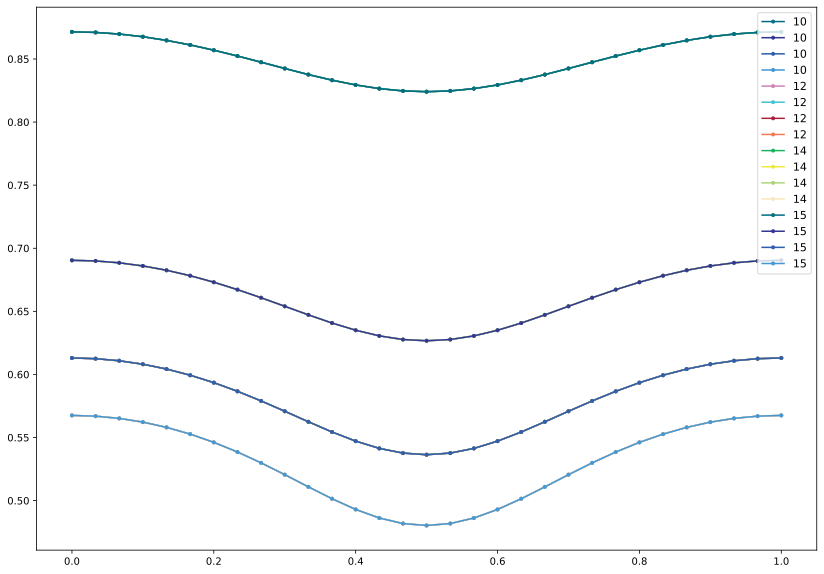

In [8]:
from matplotlib.pyplot import figure

figure(figsize=(14, 10), dpi=80)
for ncut in [10,12,14,15]:
    for njjc in [1,2,3,4]:
        plt.plot(ph_list,ME[njjc,ncut],'.-', label= str(ncut))

        # plt.ylim([1.5,4])
plt.legend()

- Change the transformation to access the bs junction variable and check that it behaves like the fluxonium limit
- Check fluxonium with the present parameters

In [ ]:
scq.GUI()

In [ ]:
scq.GUI()

In [ ]:
JJcirc.hamiltonian_symbolic

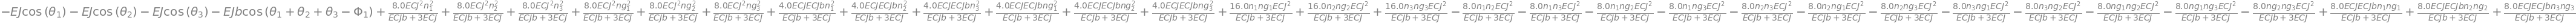

In [12]:
JJcirc.hamiltonian_symbolic